In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('Downloads/diabetes .csv')

In [50]:
# Set a seed for reproducibility
np.random.seed(450)

# Taking a random sample of 25 observations
sample = data.sample(n=25)
# Calculating statistics for sample and population
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

#Printing the mean, max values of samples and population
print('Sample Mean Glucose:', sample_mean_glucose)
print('Sample Max Glucose:', sample_max_glucose)

print('Population Mean Glucose:', population_mean_glucose)
print('Population Max Glucose:', population_max_glucose)



Sample Mean Glucose: 117.32
Sample Max Glucose: 173
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


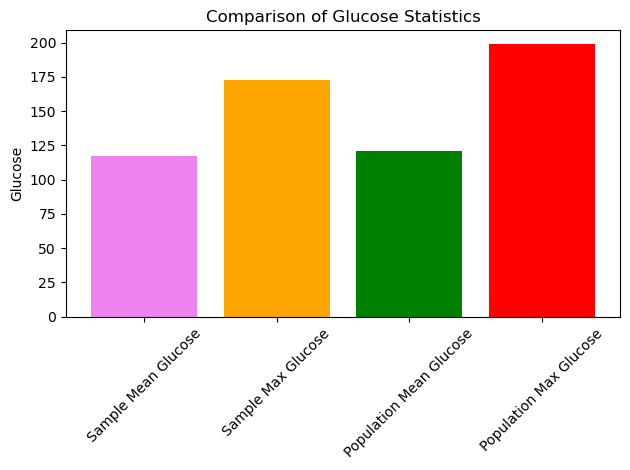

In [51]:
# Creating a bar chart for comparison
labels = ['Sample Mean Glucose', 'Sample Max Glucose', 'Population Mean Glucose', 'Population Max Glucose']
values = [sample_mean_glucose, sample_max_glucose, population_mean_glucose, population_max_glucose]

plt.bar(labels, values, color=['violet', 'orange', 'green', 'red'])
plt.ylabel('Glucose')
plt.title('Comparison of Glucose Statistics')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [53]:
np.random.seed(450)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculating the BMI for sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

print('98th percentile BMI for the sample observations:', sample_98th_percentile_bmi)
print('98th Percentile BMI for the population:' , population_98th_percentile_bmi )

98th percentile BMI for the sample observations: 46.356
98th Percentile BMI for the population: 47.52599999999996


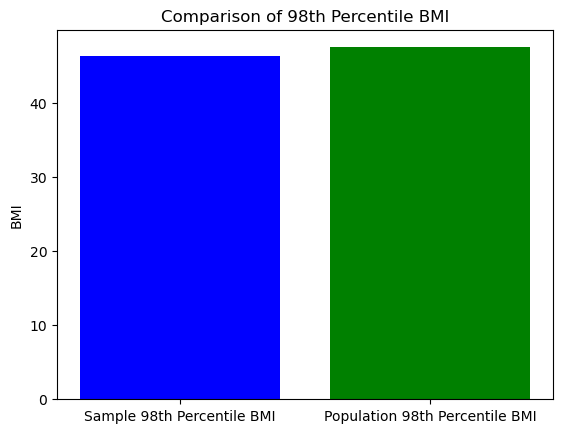

In [55]:
#plotting bar graph
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile BMI')
plt.show()

In [58]:

# Set a seed for reproducibility
np.random.seed(450)

# Number of bootstrap samples
num_samples = 500

# Number of observations in each bootstrap sample
sample_size = 150

# Initializing lists to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Generate bootstrap samples and calculate statistics
for _ in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    
    # Calculating mean, standard deviation, and percentile for the bootstrap sample
    mean = bootstrap_sample.mean()
    std = bootstrap_sample.std()
    percentile = np.percentile(bootstrap_sample, 95)  # 95th percentile for comparison
    
    # Appending statistics to lists
    bootstrap_means.append(mean)
    bootstrap_stds.append(std)
    bootstrap_percentiles.append(percentile)

# Calculate statistics for the population
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 95)  # 95th percentile for comparison


print("population_mean_blood_pressure:",population_mean)
print("population_std_dev_blood_pressure:",population_std)
print("population_95th_percentile_blood_pressure:",population_percentile)

population_mean_blood_pressure: 69.10546875
population_std_dev_blood_pressure: 19.355807170644777
population_95th_percentile_blood_pressure: 90.0


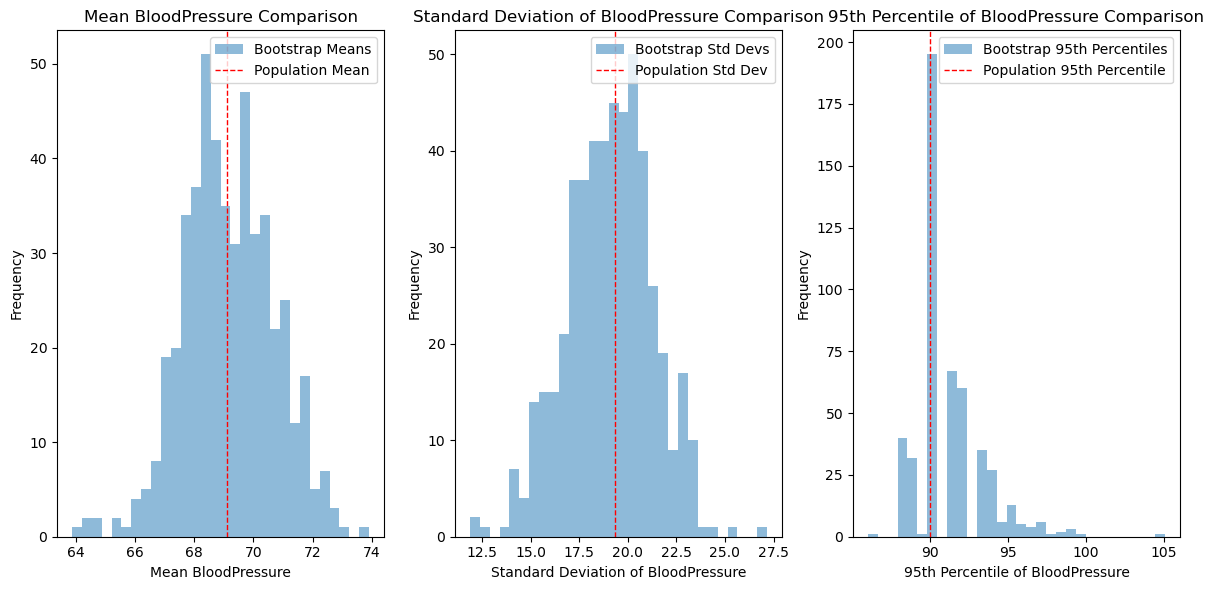

In [56]:
# Plotting
plt.figure(figsize=(12, 6))

# Mean comparison
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.5, label='Bootstrap Means')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1, label='Population Mean')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.title('Mean BloodPressure Comparison')
plt.legend()

# Standard deviation comparison
plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=30, alpha=0.5, label='Bootstrap Std Devs')
plt.axvline(population_std, color='red', linestyle='dashed', linewidth=1, label='Population Std Dev')
plt.xlabel('Standard Deviation of BloodPressure')
plt.ylabel('Frequency')
plt.title('Standard Deviation of BloodPressure Comparison')
plt.legend()

# Percentile comparison
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, alpha=0.5, label='Bootstrap 95th Percentiles')
plt.axvline(population_percentile, color='red', linestyle='dashed', linewidth=1, label='Population 95th Percentile')
plt.xlabel('95th Percentile of BloodPressure')
plt.ylabel('Frequency')
plt.title('95th Percentile of BloodPressure Comparison')
plt.legend()
plt.show()
